In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
import datetime
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline

pd.options.display.max_columns = 999
pd.options.display.max_rows = 100

sns.set_style("whitegrid")
# plt.rcParams.update({'font.size': 32})
# sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 2})  
# plt.rcParams['figure.figsize'] = 10, 6

from datetime import datetime
str(datetime.now())

'2017-10-23 16:10:23.521700'

In [2]:
df = data.read_data('Vansjo/VAN1_data_2017_02_28_10_55.xlsx')
plotter = ResultsPlotter(f='../IO/test.mat')
results = plotter.env_getter('water', basin=1)

/Users/MarkelovIgor/git/biogeochemistry/MyLake_v2_Vansjo/Postproc_code/data.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)


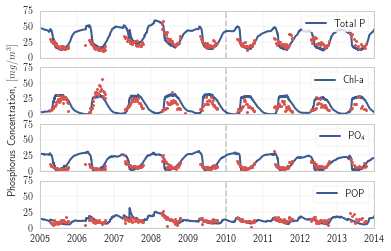

In [3]:
fig, axes = plt.subplots(4,1,sharey=True, sharex=True)

x = 'SampleDate'
env = 'water'

results = plotter.env_getter(env)
# for d,c in zip([5,], sns.color_palette()):

inx = np.where(results['z'][0, 0] == 4)[0][0]
TOTP = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['DOP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0)
Chl = np.mean(results['concentrations'][0, 0]['C'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['Chl']
                                                                                      [0, 0][0:inx, :], axis=0)
PO4 = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0)
Part = np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0)


axes[0].plot(-366 + results['days'][0, 0][0], TOTP, c=sns.xkcd_rgb["denim blue"], lw=2, label='Total P')
axes[1].plot(-366 + results['days'][0, 0][0], Chl, c=sns.xkcd_rgb["denim blue"], lw=2, label='Chl-a')
axes[2].plot(-366 + results['days'][0, 0][0], PO4, c=sns.xkcd_rgb["denim blue"], lw=2, label=r'PO\textsubscript{4}')
axes[3].plot(-366 + results['days'][0, 0][0], Part, c=sns.xkcd_rgb["denim blue"], lw=2, label='POP')




variable = 'TOTP'
axes[0].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

Chl = np.loadtxt('../obs/store_obs/Cha_aquaM_march_2017.dat', delimiter=',')
axes[1].plot(-366 + Chl[:, 0], Chl[:, 1], 'bo', c=sns.xkcd_rgb["pale red"], markersize=3)

variable = 'PO4-P'
axes[2].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

variable = 'POP'
axes[3].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)


for ax in axes:
    ax.grid(linestyle='-', linewidth=0.2)
    ax.set_ylim([0, 75])
    ax.set_xlim([732313 - 366, 735234 ])
    ax.plot((732313+366*4-1, 732313+366*4-1), (0, 100), 'k--', lw=0.3)
#     ax.set_ylabel(r'$[mg / m^3]$')
    ax.legend(loc=1, frameon=1)
    ax.set_xticks([], [])
    ax.set_yticks([0,25,50,75])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter(' '))    

axes[3].xaxis.set_major_locator(mdates.MonthLocator(interval=12))
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   


fig.text(0.05, 0.5, r'Phosphorus Concentration, $[mg / m^3]$', va='center', rotation='vertical')

In [4]:
import extra_methods
import metrics

In [5]:
df['date2num'] = df.SampleDate.apply(extra_methods.convert_timestamp_to_num)

### Chl-a metrics

In [6]:
x = 'SampleDate'
env = 'water'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]
Chl_s = np.mean(results['concentrations'][0, 0]['C'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['Chl'][0, 0][0:inx, :], axis=0)
Chl_o = np.loadtxt('../obs/store_obs/Cha_aquaM_march_2017.dat', delimiter=',')

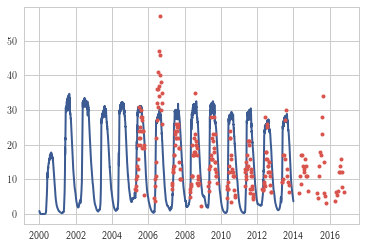

In [7]:
plt.plot(-366 + results['days'][0, 0][0], Chl_s, c=sns.xkcd_rgb["denim blue"], lw=2, label='Chl-a')
plt.plot_date(-366+Chl_o[:, 0], Chl_o[:, 1], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4)

In [8]:
days_sim = results['days'][0, 0][0]
days_obs = Chl_o[:, 0]

In [9]:
extra_methods.run_metrics(days_sim, Chl_s, Chl_o[:, 0], Chl_o[:, 1], calibration_end_date='2010-01-01')

Metrics                            During calibration            After calibration             
mae                           	 8.556224998094892             	 10.84892427564884             
rmse                          	 10.006774067336597            	 12.094664560176742            
correlation                   	 0.5704607604193853            	 0.44979290207319217           
rsquared                      	 -0.028518723155416037         	 -3.361665825961494            
pc_bias                       	 26.215959065897177            	 72.34449308583321             
likelihood                    	 0.005842516801734762          	 3.378803998007305e-10         
NS                            	 -0.028518723155417813         	 -3.3616658259614924           


In [10]:
extra_methods.generate_latex_table(days_sim, Chl_s, Chl_o[:, 0], Chl_o[:, 1], calibration_end_date='2010-01-01')

 & 8.56 / 10.85 & 10.01 / 12.09 & 0.57 / 0.45 & -0.03 / -3.36 & 26.22 / 72.34 & 0.01 / 0.00 & -0.03 / -3.36 \\


### Total P metrics

In [11]:
df['date2num'] = df.SampleDate.apply(extra_methods.convert_timestamp_to_num)
env = 'water'
x = 'SampleDate'

In [12]:
variable = 'TOTP'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]
TOTP_s = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['DOP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0)

In [13]:
TOTP_o = np.array([df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)]['date2num'].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values])

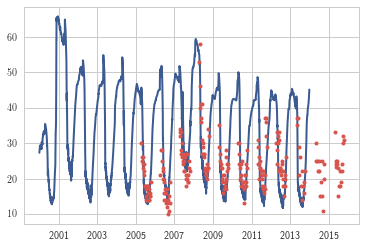

In [14]:
plt.plot(-366 + results['days'][0, 0][0], TOTP_s, c=sns.xkcd_rgb["denim blue"], lw=2, label='Total P')
plt.plot_date(-366+TOTP_o[0, :], TOTP_o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4)

In [15]:
extra_methods.run_metrics(results['days'][0, 0][0], TOTP_s, TOTP_o[0,:], TOTP_o[1, :], calibration_end_date='2010-01-01')

Metrics                            During calibration            After calibration             
mae                           	 6.496902102327155             	 7.278374076324952             
rmse                          	 8.673858951228285             	 9.411031141294734             
correlation                   	 0.6785696244804367            	 0.5024598831359542            
rsquared                      	 -0.24969998417877948          	 -1.7350613024370483           
pc_bias                       	 10.723628302242254            	 -6.666923693628151            
likelihood                    	 0.0019333521432191845         	 1.1505085313178883e-06        
NS                            	 -0.24969998417877992          	 -1.7350613024370478           


In [16]:
extra_methods.generate_latex_table(results['days'][0, 0][0], TOTP_s, TOTP_o[0,:], TOTP_o[1, :], calibration_end_date='2010-01-01')

 & 6.50 / 7.28 & 8.67 / 9.41 & 0.68 / 0.50 & -0.25 / -1.74 & 10.72 / -6.67 & 0.00 / 0.00 & -0.25 / -1.74 \\


### PO4 metrics

In [17]:
variable = 'PO4-P'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]

In [18]:
PO4_s = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0)

In [19]:
PO4_o = np.array([df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)]['date2num'].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values])

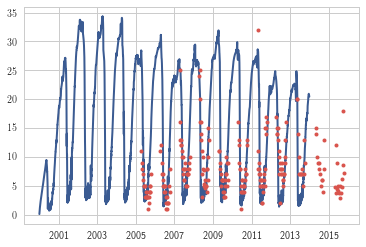

In [20]:
plt.plot(-366 + results['days'][0, 0][0], PO4_s, c=sns.xkcd_rgb["denim blue"], lw=2, label='PO4')
plt.plot_date(-366+PO4_o[0, :], PO4_o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4)

In [21]:
extra_methods.run_metrics(results['days'][0, 0][0], PO4_s, PO4_o[0,:], PO4_o[1, :], calibration_end_date='2010-01-01')

Metrics                            During calibration            After calibration             
mae                           	 4.48519096651324              	 4.594445180029744             
rmse                          	 6.609092272841805             	 6.35032226862098              
correlation                   	 0.596876048762727             	 0.617835431305639             
rsquared                      	 -1.1982161771319042           	 -0.721360023902657            
pc_bias                       	 29.15739543865102             	 -3.713650350393664            
likelihood                    	 1.6851331463884967e-05        	 0.0001828580993108699         
NS                            	 -1.1982161771319046           	 -0.721360023902657            


In [22]:
extra_methods.generate_latex_table(results['days'][0, 0][0], PO4_s, PO4_o[0,:], PO4_o[1, :], calibration_end_date='2010-01-01')

 & 4.49 / 4.59 & 6.61 / 6.35 & 0.60 / 0.62 & -1.20 / -0.72 & 29.16 / -3.71 & 0.00 / 0.00 & -1.20 / -0.72 \\


### PP metrics

In [23]:
variable = 'POP'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]

In [24]:
PP_s = np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0)

In [25]:
PP_o = np.array([df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)]['date2num'].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values])

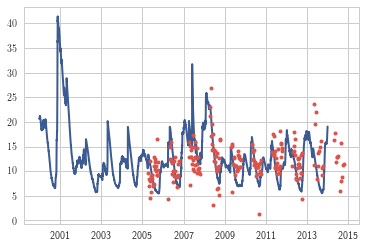

In [26]:
plt.plot(-366 + results['days'][0, 0][0], PP_s, c=sns.xkcd_rgb["denim blue"], lw=2, label='PP')
plt.plot_date(-366+PP_o[0, :], PP_o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4)

In [27]:
extra_methods.run_metrics(results['days'][0, 0][0], PP_s, PP_o[0,:], PP_o[1, :], calibration_end_date='2010-01-01')

Metrics                            During calibration            After calibration             
mae                           	 3.488001162219468             	 3.2986715005127394            
rmse                          	 4.545309607155309             	 4.1524101601209935            
correlation                   	 0.4759722473123341            	 0.4104952932632775            
rsquared                      	 -0.6690236244383576           	 -0.6626957946245613           
pc_bias                       	 2.5372560189364957            	 -20.28144375741508            
likelihood                    	 0.000237553398922867          	 0.00024518954998979827        
NS                            	 -0.6690236244383578           	 -0.6626957946245615           


In [28]:
extra_methods.generate_latex_table(results['days'][0, 0][0], PP_s, PP_o[0,:], PP_o[1, :], calibration_end_date='2010-01-01')

 & 3.49 / 3.30 & 4.55 / 4.15 & 0.48 / 0.41 & -0.67 / -0.66 & 2.54 / -20.28 & 0.00 / 0.00 & -0.67 / -0.66 \\


### Oxygen



Depth: 0m
Metrics                            During calibration            After calibration             
mae                           	 1.4167893848393536            	 0.9048648665527599            
rmse                          	 2.0202831051007712            	 1.5396961634977238            
correlation                   	 0.26532959004783485           	 0.09830017475024506           
rsquared                      	 -0.03536856963511692          	 -0.48960684383784847          
pc_bias                       	 -5.345068484111524            	 -2.056565202413515            
likelihood                    	 0.005645802963544479          	 0.0005825857231248118         
NS                            	 -0.035368569635117586         	 -0.4896068438378469           


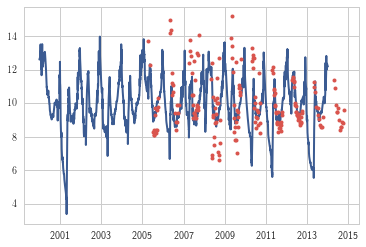



Depth: 5m
Metrics                            During calibration            After calibration             
mae                           	 1.8032883890655809            	 0.9406892192178322            
rmse                          	 2.2952399815096283            	 1.5583504463226139            
correlation                   	 0.4174102417751103            	 0.3116533916047145            
rsquared                      	 -0.3060278305861479           	 -0.5674576633692257           
pc_bias                       	 -13.42056835159479            	 -7.8757390555279585           
likelihood                    	 0.001458802838971999          	 0.00039473799503859805        
NS                            	 -0.3060278305861477           	 -0.5674576633692261           


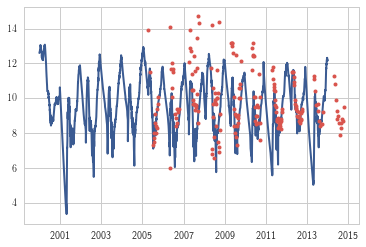



Depth: 10m
Metrics                            During calibration            After calibration             
mae                           	 2.270794665543379             	 1.3884876521556924            
rmse                          	 2.8825806966800602            	 1.931165504416526             
correlation                   	 0.4600023822356571            	 0.42438105265871334           
rsquared                      	 -0.3566099122669739           	 -0.27115525438693644          
pc_bias                       	 -18.179254367952925           	 -9.776573090000806            
likelihood                    	 0.0011328150365357656         	 0.0017366865341606383         
NS                            	 -0.3566099122669746           	 -0.2711552543869371           


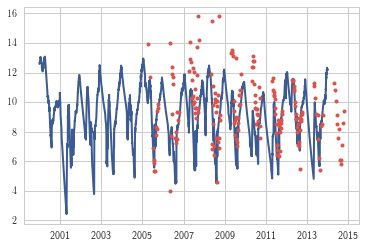



Depth: 15m
Metrics                            During calibration            After calibration             
mae                           	 2.4271668901108043            	 1.5012143876732396            
rmse                          	 3.1872857294441697            	 2.109162514037665             
correlation                   	 0.5444310067547216            	 0.5247769511763227            
rsquared                      	 -0.13959769649273568          	 -0.010144560404412362         
pc_bias                       	 -20.375367669831917           	 -10.014531596150533           
likelihood                    	 0.0033527026994333953         	 0.006404702440933015          
NS                            	 -0.13959769649273546          	 -0.010144560404411251         


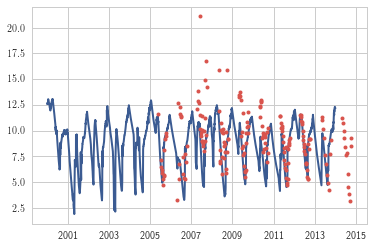



Depth: 20m
Metrics                            During calibration            After calibration             
mae                           	 2.5601476433395334            	 1.5807467441962895            
rmse                          	 3.1219841721974313            	 2.2298566134452025            
correlation                   	 0.5319193807429943            	 0.5596226510859146            
rsquared                      	 -0.1477633259588449           	 0.037780833508827105          
pc_bias                       	 -19.472997797567217           	 -10.770124927419664           
likelihood                    	 0.003218574788115051          	 0.00813893589896459           
NS                            	 -0.14776332595884512          	 0.03778083350882744           


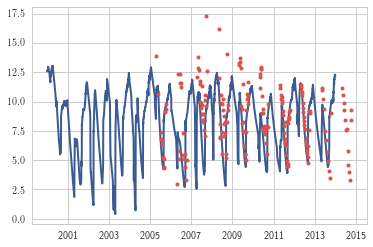



Depth: 25m
Metrics                            During calibration            After calibration             
mae                           	 2.569273641569602             	 1.637681438503965             
rmse                          	 3.1619833777100337            	 2.377492877659842             
correlation                   	 0.5370224899992884            	 0.5438416498191448            
rsquared                      	 -0.1089225834590497           	 -0.0021424423752764987        
pc_bias                       	 -19.870794620983503           	 -11.23116653873747            
likelihood                    	 0.003908455806874111          	 0.006666153901186457          
NS                            	 -0.10892258345905015          	 -0.0021424423752767208        


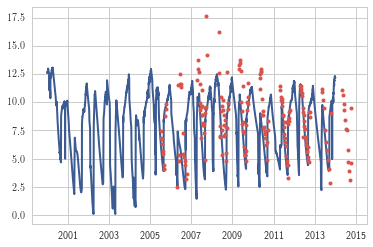



Depth: 30m
Metrics                            During calibration            After calibration             
mae                           	 2.7600935934769977            	 1.6112780229606254            
rmse                          	 3.3990102135134               	 2.3885629500416026            
correlation                   	 0.5013144500628187            	 0.5771838595443417            
rsquared                      	 -0.16491093095266174          	 0.10505314220458606           
pc_bias                       	 -21.37121439543216            	 -11.217797841446808           
likelihood                    	 0.0029541194624994028         	 0.011393249034209319          
NS                            	 -0.16491093095266174          	 0.10505314220458628           


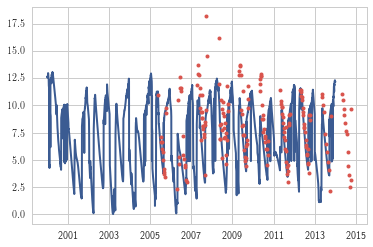



Depth: 35m
Metrics                            During calibration            After calibration             
mae                           	 2.9399304779300532            	 1.6521976386525141            
rmse                          	 3.573703770019044             	 2.317825331682413             
correlation                   	 0.38997530521289475           	 0.6529578714619383            
rsquared                      	 -0.23009952783329024          	 0.3071424358377962            
pc_bias                       	 -20.927331102917673           	 -11.268626076590342           
likelihood                    	 0.0021324203300769787         	 0.03129528534267821           
NS                            	 -0.23009952783329068          	 0.3071424358377959            


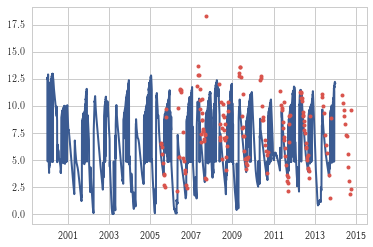



Depth: 40m
Metrics                            During calibration            After calibration             
mae                           	 3.0876952845944623            	 1.9660100006575951            
rmse                          	 3.5098806583422113            	 2.7210644362772998            
correlation                   	 0.5821445440360935            	 0.6240770327969788            
rsquared                      	 -0.15910300171338387          	 0.3607717524791251            
pc_bias                       	 -30.000336098619968           	 -2.839515756167298            
likelihood                    	 0.0030411637979016705         	 0.04091979950453544           
NS                            	 -0.15910300171338387          	 0.3607717524791251            


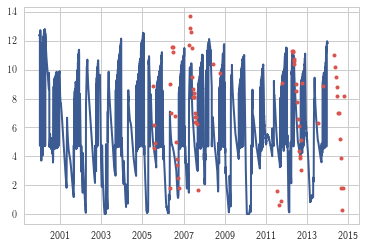

In [29]:
variable_s = 'O2'
variable_o = 'O2'
days_sim = results['days'][0, 0][0]
for d in [0,5,10,15,20,25, 30, 35, 40]:
    inx = np.where(results['z'][0, 0] == d)[0][0]
    s = results['concentrations'][0, 0][variable_s][0, 0][inx, :]/1000
    o = np.array([df[(np.isfinite(df[variable_o])) & (df['Depth1'] == d)]['date2num'].values, df[(np.isfinite(df[variable_o])) & (df.Depth1 == d)][variable_o].values])
    print('\n\nDepth: {}m'.format(d))
    extra_methods.run_metrics(results['days'][0, 0][0], s, o[0,:], o[1, :], calibration_end_date='2010-01-01')
    plt.plot(-366 + results['days'][0, 0][0], s, c=sns.xkcd_rgb["denim blue"], lw=2)
    plt.plot_date(-366+o[0, :], o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4, label=variable_o)
    plt.show(block=False)

### Generate table for Latex

In [30]:
variable_s = 'O2'
variable_o = 'O2'
days_sim = results['days'][0, 0][0]
for d in [0,5,10,15,20,25, 30, 35, 40]:
    print(d, end=' ')
    inx = np.where(results['z'][0, 0] == d)[0][0]
    s = results['concentrations'][0, 0][variable_s][0, 0][inx, :]/1000
    o = np.array([df[(np.isfinite(df[variable_o])) & (df['Depth1'] == d)]['date2num'].values, df[(np.isfinite(df[variable_o])) & (df.Depth1 == d)][variable_o].values])
    extra_methods.generate_latex_table(results['days'][0, 0][0], s, o[0,:], o[1, :], calibration_end_date='2010-01-01')

0  & 1.42 / 0.90 & 2.02 / 1.54 & 0.27 / 0.10 & -0.04 / -0.49 & -5.35 / -2.06 & 0.01 / 0.00 & -0.04 / -0.49 \\
5  & 1.80 / 0.94 & 2.30 / 1.56 & 0.42 / 0.31 & -0.31 / -0.57 & -13.42 / -7.88 & 0.00 / 0.00 & -0.31 / -0.57 \\
10  & 2.27 / 1.39 & 2.88 / 1.93 & 0.46 / 0.42 & -0.36 / -0.27 & -18.18 / -9.78 & 0.00 / 0.00 & -0.36 / -0.27 \\
15  & 2.43 / 1.50 & 3.19 / 2.11 & 0.54 / 0.52 & -0.14 / -0.01 & -20.38 / -10.01 & 0.00 / 0.01 & -0.14 / -0.01 \\
20  & 2.56 / 1.58 & 3.12 / 2.23 & 0.53 / 0.56 & -0.15 / 0.04 & -19.47 / -10.77 & 0.00 / 0.01 & -0.15 / 0.04 \\
25  & 2.57 / 1.64 & 3.16 / 2.38 & 0.54 / 0.54 & -0.11 / -0.00 & -19.87 / -11.23 & 0.00 / 0.01 & -0.11 / -0.00 \\
30  & 2.76 / 1.61 & 3.40 / 2.39 & 0.50 / 0.58 & -0.16 / 0.11 & -21.37 / -11.22 & 0.00 / 0.01 & -0.16 / 0.11 \\
35  & 2.94 / 1.65 & 3.57 / 2.32 & 0.39 / 0.65 & -0.23 / 0.31 & -20.93 / -11.27 & 0.00 / 0.03 & -0.23 / 0.31 \\
40  & 3.09 / 1.97 & 3.51 / 2.72 & 0.58 / 0.62 & -0.16 / 0.36 & -30.00 / -2.84 & 0.00 / 0.04 & -0.16 / 0.36 \

### Temperature



Depth: 0m
Metrics                            During calibration            After calibration             
mae                           	 1.3666298061000255            	 1.291731354729277             
rmse                          	 1.550347644323442             	 1.4717513601171344            
correlation                   	 0.9750372649493885            	 0.9866727447275365            
rsquared                      	 0.8564931345870892            	 0.87725149459682              
pc_bias                       	 -7.898810978858465            	 -8.636264060883693            
likelihood                    	 0.4879539086562335            	 0.5413211642495357            
NS                            	 0.8564931345870892            	 0.87725149459682              


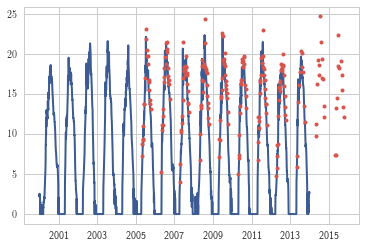



Depth: 5m
Metrics                            During calibration            After calibration             
mae                           	 1.235610064948812             	 1.3630167476492336            
rmse                          	 1.4207315699316891            	 1.5581444393658102            
correlation                   	 0.979692677005537             	 0.9801492959448665            
rsquared                      	 0.8481261391133704            	 0.8717856143407637            
pc_bias                       	 -7.998950188590368            	 -8.9782800869981              
likelihood                    	 0.46796147518519743           	 0.5267275072026201            
NS                            	 0.8481261391133703            	 0.8717856143407637            


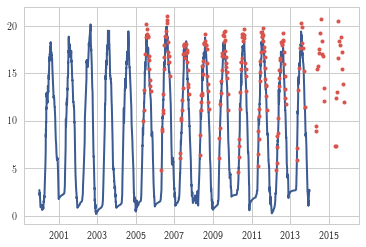



Depth: 10m
Metrics                            During calibration            After calibration             
mae                           	 1.0305911190504888            	 1.1696018237887305            
rmse                          	 1.223063143687167             	 1.4278839045334484            
correlation                   	 0.9370298355149826            	 0.9448336992268436            
rsquared                      	 0.8450107825751432            	 0.8580253020746927            
pc_bias                       	 -2.698897964249537            	 -5.366777463379481            
likelihood                    	 0.46072861953420513           	 0.49170639948651484           
NS                            	 0.8450107825751432            	 0.8580253020746927            


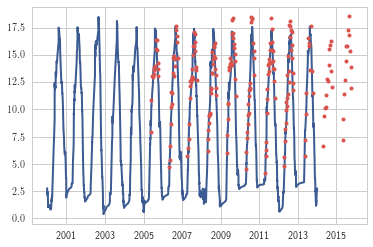



Depth: 15m
Metrics                            During calibration            After calibration             
mae                           	 1.1286953833208526            	 0.9809559159079797            
rmse                          	 1.348166343189192             	 1.1565826408334732            
correlation                   	 0.908619726676299             	 0.9425428557579352            
rsquared                      	 0.7777539098157583            	 0.8301371950120242            
pc_bias                       	 -1.3802192556961532           	 -1.5803651102417196           
likelihood                    	 0.32915370432334345           	 0.4277082285179314            
NS                            	 0.7777539098157582            	 0.8301371950120242            


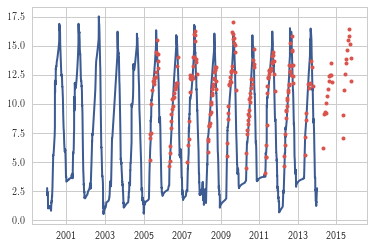



Depth: 20m
Metrics                            During calibration            After calibration             
mae                           	 1.0904805912754163            	 0.9178870919913307            
rmse                          	 1.316611570220361             	 1.0692401223204102            
correlation                   	 0.8991970995686648            	 0.9544171723634362            
rsquared                      	 0.741935745129432             	 0.8210320885673494            
pc_bias                       	 -3.0171888557239566           	 -4.6935222372838075           
likelihood                    	 0.2751823598518792            	 0.40867316206254095           
NS                            	 0.741935745129432             	 0.8210320885673494            


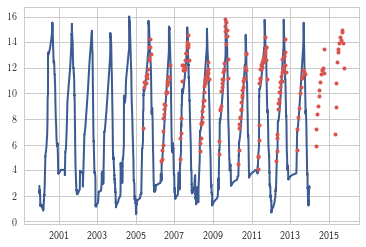



Depth: 25m
Metrics                            During calibration            After calibration             
mae                           	 1.1369115581904026            	 0.9450143569376143            
rmse                          	 1.4074647473868866            	 1.1183534694435064            
correlation                   	 0.8767292621311665            	 0.9502796626992179            
rsquared                      	 0.6748152437526764            	 0.7819684249082577            
pc_bias                       	 -3.9533519327165405           	 -6.618157938629487            
likelihood                    	 0.19672985588693603           	 0.3361634175633833            
NS                            	 0.6748152437526762            	 0.7819684249082576            


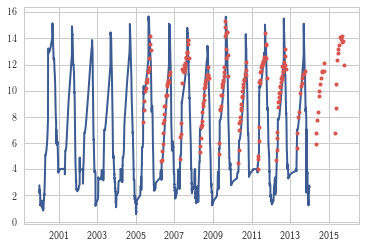



Depth: 30m
Metrics                            During calibration            After calibration             
mae                           	 1.1707729972181025            	 1.0541776164520429            
rmse                          	 1.4403251068373706            	 1.2489261637166478            
correlation                   	 0.8624607528107759            	 0.9259963855085251            
rsquared                      	 0.6275011740925471            	 0.6813632451691505            
pc_bias                       	 -4.5628752381069075           	 -7.710463138732943            
likelihood                    	 0.1552848464551315            	 0.20327739108381454           
NS                            	 0.6275011740925468            	 0.6813632451691507            


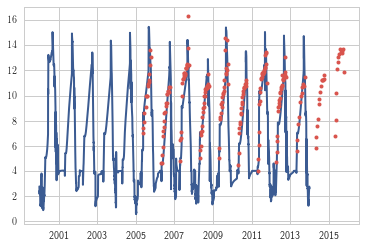



Depth: 35m
Metrics                            During calibration            After calibration             
mae                           	 1.197982113563936             	 1.183372774155947             
rmse                          	 1.4699948997258705            	 1.499892655948262             
correlation                   	 0.8680076839811955            	 0.8746931454066939            
rsquared                      	 0.533287366000401             	 0.44539642301379045           
pc_bias                       	 -5.306511015830749            	 -9.562255680891536            
likelihood                    	 0.09694968271181631           	 0.06247318308661671           
NS                            	 0.5332873660004014            	 0.4453964230137901            


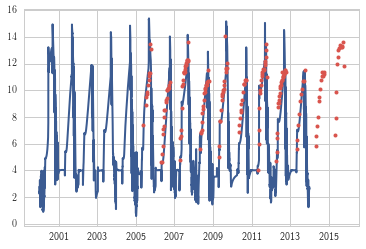



Depth: 40m
Metrics                            During calibration            After calibration             
mae                           	 1.141255948710672             	 1.6999459671677097            
rmse                          	 1.492513308917366             	 2.199118814267427             
correlation                   	 0.8563925935479987            	 0.6945156995550329            
rsquared                      	 0.5172152530807623            	 -0.17234982437171853          
pc_bias                       	 -7.7794213230834925           	 -12.41853477591207            
likelihood                    	 0.08946357367464354           	 0.0028462608690745564         
NS                            	 0.5172152530807623            	 -0.17234982437171875          


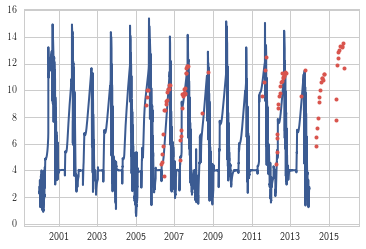

In [31]:
variable_o = 'Temperatur'
days_sim = results['days'][0, 0][0]
for d in [0,5,10,15,20,25, 30, 35, 40]:
    inx = np.where(results['z'][0, 0] == d)[0][0]
    s = results['T'][0, 0][inx, :]
    o = np.array([df[(np.isfinite(df[variable_o])) & (df['Depth1'] == d)]['date2num'].values, df[(np.isfinite(df[variable_o])) & (df.Depth1 == d)][variable_o].values])
    print('\n\nDepth: {}m'.format(d))
    extra_methods.run_metrics(results['days'][0, 0][0], s, o[0,:], o[1, :], calibration_end_date='2010-01-01')
    plt.figure()
    plt.plot(-366 + results['days'][0, 0][0], s, c=sns.xkcd_rgb["denim blue"], lw=2)
    plt.plot_date(-366+o[0, :], o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4, label=variable_o)
    plt.show(block=False)

In [32]:
variable_o = 'Temperatur'
days_sim = results['days'][0, 0][0]
days_sim = results['days'][0, 0][0]
for d in [0,5,10,15,20,25, 30, 35, 40]:
    inx = np.where(results['z'][0, 0] == d)[0][0]
    s = results['T'][0, 0][inx, :]
    o = np.array([df[(np.isfinite(df[variable_o])) & (df['Depth1'] == d)]['date2num'].values, df[(np.isfinite(df[variable_o])) & (df.Depth1 == d)][variable_o].values])
    print(d, end=' ')
    extra_methods.generate_latex_table(results['days'][0, 0][0], s, o[0,:], o[1, :], calibration_end_date='2010-01-01')

0  & 1.37 / 1.29 & 1.55 / 1.47 & 0.98 / 0.99 & 0.86 / 0.88 & -7.90 / -8.64 & 0.49 / 0.54 & 0.86 / 0.88 \\
5  & 1.24 / 1.36 & 1.42 / 1.56 & 0.98 / 0.98 & 0.85 / 0.87 & -8.00 / -8.98 & 0.47 / 0.53 & 0.85 / 0.87 \\
10  & 1.03 / 1.17 & 1.22 / 1.43 & 0.94 / 0.94 & 0.85 / 0.86 & -2.70 / -5.37 & 0.46 / 0.49 & 0.85 / 0.86 \\
15  & 1.13 / 0.98 & 1.35 / 1.16 & 0.91 / 0.94 & 0.78 / 0.83 & -1.38 / -1.58 & 0.33 / 0.43 & 0.78 / 0.83 \\
20  & 1.09 / 0.92 & 1.32 / 1.07 & 0.90 / 0.95 & 0.74 / 0.82 & -3.02 / -4.69 & 0.28 / 0.41 & 0.74 / 0.82 \\
25  & 1.14 / 0.95 & 1.41 / 1.12 & 0.88 / 0.95 & 0.67 / 0.78 & -3.95 / -6.62 & 0.20 / 0.34 & 0.67 / 0.78 \\
30  & 1.17 / 1.05 & 1.44 / 1.25 & 0.86 / 0.93 & 0.63 / 0.68 & -4.56 / -7.71 & 0.16 / 0.20 & 0.63 / 0.68 \\
35  & 1.20 / 1.18 & 1.47 / 1.50 & 0.87 / 0.87 & 0.53 / 0.45 & -5.31 / -9.56 & 0.10 / 0.06 & 0.53 / 0.45 \\
40  & 1.14 / 1.70 & 1.49 / 2.20 & 0.86 / 0.69 & 0.52 / -0.17 & -7.78 / -12.42 & 0.09 / 0.00 & 0.52 / -0.17 \\
